# Pitch Extraction Notebook Guide



This notebook is designed for pitch extraction from audio files.

## Importing Libraries
The following libraries are imported:
- `parselmouth`: For pitch extraction
- `numpy`: For numerical operations
- `pickle`: For data serialization
- `matplotlib`: For data visualization

In [1]:
import parselmouth
import numpy as np
import pickle
import matplotlib.pyplot as plt

## Setting Paths
Here, you can set the paths for your input audio file and output pickle file.

In [2]:
# Replace these paths with the paths to your input audio file and output pickle file
audio_path = "C:/Users/cosmo/Desktop/Random Scripts/Co-Speech Gesture Automation/Co-Speech-Gesture-Automation/SOUND_FILES/5012_I.WAV"
pickle_path = "C:/Users/cosmo/Desktop/Random Scripts/Co-Speech Gesture Automation/Co-Speech-Gesture-Automation/SOUND_FILES/5012_I_pitch.pkl"

## Pitch Extraction
This section utilizes the Parselmouth library to extract pitch from the audio file.

In [3]:
sound = parselmouth.Sound(audio_path)
pitch = sound.to_pitch(time_step=0.1)  # Sample rate of 10 Hz
f0 = pitch.selected_array['frequency']
time_ms = np.arange(0, len(f0) * 10, 10).astype(int)

## Data Structure
Pitch curve data is stored in a dictionary, which can be converted to a list of tuples for further processing.

In [4]:
pitch_curve_data = {
    'time_ms': time_ms,
    'f0': f0
}

# Convert dictionary to list of tuples and show first few elements
pitch_curve_list = list(pitch_curve_data.items())

# Print first 10 elements of list
print("Shape of time_ms:", time_ms.shape)
print("Sample time_ms:", time_ms[:10])  # First 10 elements
print("Shape of f0:", f0.shape)
print("Sample f0:", f0[:10])  # First 10 elements



Shape of time_ms: (6506,)
Sample time_ms: [ 0 10 20 30 40 50 60 70 80 90]
Shape of f0: (6506,)
Sample f0: [  0.           0.           0.         290.51221709   0.
 148.53279769   0.         162.64818592 170.36159182 160.31045772]


## Data Serialization
The pitch curve data is serialized and saved as a pickle file.

In [5]:
# Save the pitch curve data as a pickle file
with open(pickle_path, 'wb') as f:
    pickle.dump(pitch_curve_data, f)


## Data Visualization
This final section provides a plot to visualize the pitch curve.

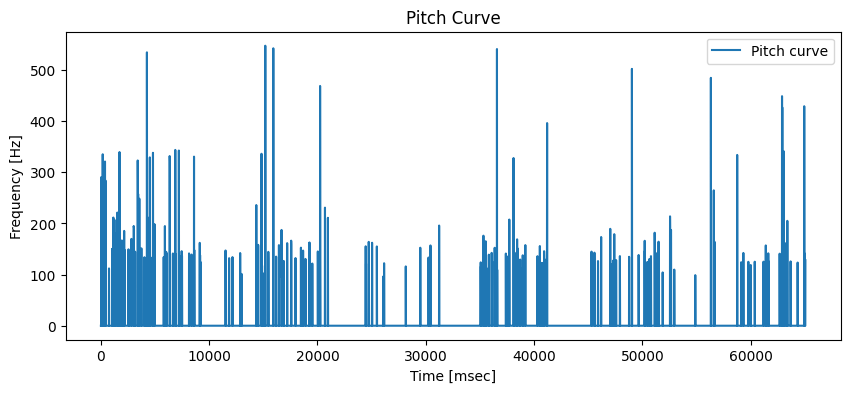

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(time_ms, f0, label='Pitch curve')
plt.xlabel('Time [msec]')
plt.ylabel('Frequency [Hz]')
plt.title('Pitch Curve')
plt.legend()
plt.show()